## Adam Pithenwala

0901AD211003

## Titanic Problem

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [166]:
data = pd.read_csv("./titanic_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [167]:
print(data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [168]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [169]:
data.describe(include=['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Relation between Sex and Survived

In [170]:
data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


### Relation between Embarked and Survived

In [171]:
data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


### Relation between Pclass and Survived

In [172]:
data.pivot_table(index=["Sex"], columns=['Pclass'], values=['Survived'], aggfunc='count')

Survived          
Pclass        1    2    3
Sex                      
female       94   76  144
male        122  108  347

#### Total Females

In [173]:
data['Sex'].tolist().count('female')


314

#### Total males

In [174]:
data['Sex'].tolist().count('male')

577

#### Survived gender in different classes

In [175]:
data[data['Survived']==1].groupby(['Sex','Pclass']).size().reset_index(name='count')

,Sex,Pclass,count
0,female,1,91
1,female,2,70
2,female,3,72
3,male,1,45
4,male,2,17
5,male,3,47


#### Died gender in different classes

In [176]:
data[data['Survived']==0].groupby(['Sex','Pclass']).size().reset_index(name='count')

,Sex,Pclass,count
0,female,1,3
1,female,2,6
2,female,3,72
3,male,1,77
4,male,2,91
5,male,3,300


#### People that survived from different embarked 

In [177]:
data[data['Survived']==1].groupby(['Embarked']).size().reset_index(name='count')

,Embarked,count
0,C,93
1,Q,30
2,S,217


#### Total number of null values in age

In [178]:
data['Age'].isnull().sum()

177

In [179]:
data_null = data[data['Age'].isna()]
data_null["PassengerId"].sum()
data_null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [180]:
data_notnull = data[np.isfinite(data['Age'])]
data_notnull

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [181]:

from sklearn.linear_model import LinearRegression

In [182]:
lm = LinearRegression()

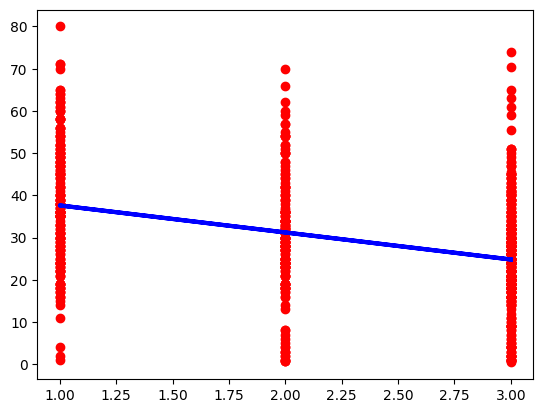

In [183]:
lm.fit(data_notnull[['Pclass']],data_notnull['Age'])
pred_used = lm.predict(data_null[['Pclass']])
plt.scatter(data_notnull[['Pclass']],data_notnull['Age'], color="red")
plt.plot(data_null[['Pclass']],pred_used,color="blue",linewidth=3)

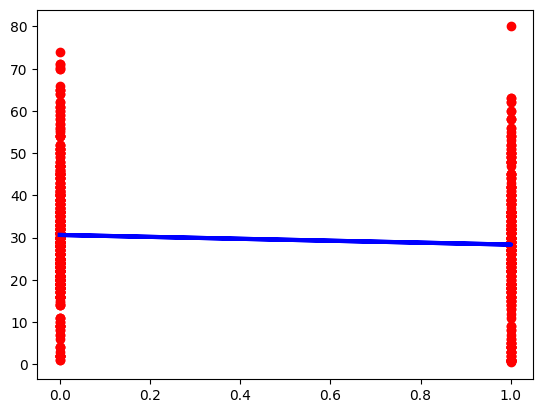

In [184]:
lm.fit(data_notnull[['Survived']],data_notnull['Age'])
pred = lm.predict(data_null[['Survived']])
plt.scatter(data_notnull[['Survived']],data_notnull['Age'], color="red")
plt.plot(data_null[['Survived']],pred,color="blue",linewidth=3)

In [185]:
df1 = data_notnull

In [186]:
df1 = df1.replace({'Sex' : { "male" : 0, "female" : 1}})

In [187]:
df2 =data_null
df2 = df2.replace({'Sex' : { "male" : 0, "female" : 1}})

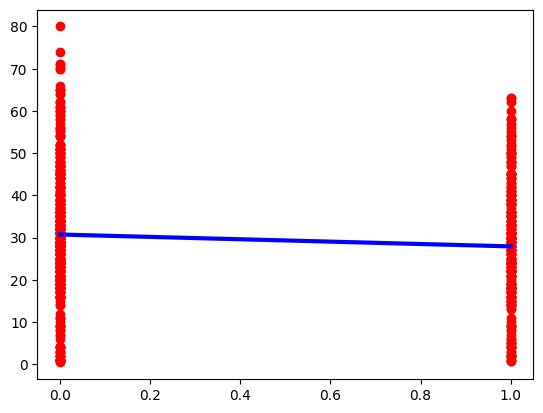

In [188]:
lm.fit(df1[['Sex']],df1['Age'])
pred = lm.predict(df2[['Sex']])
plt.scatter(df1[['Sex']],df1['Age'], color="red")
plt.plot(df2[['Sex']],pred,color="blue",linewidth=3)

In [189]:
pred_used

array([24.81509126, 31.2136139 , 24.81509126, 24.81509126, 24.81509126,
       24.81509126, 37.61213655, 24.81509126, 24.81509126, 24.81509126,
       24.81509126, 24.81509126, 24.81509126, 24.81509126, 37.61213655,
       37.61213655, 24.81509126, 24.81509126, 24.81509126, 24.81509126,
       24.81509126, 24.81509126, 24.81509126, 24.81509126, 24.81509126,
       24.81509126, 24.81509126, 24.81509126, 24.81509126, 24.81509126,
       24.81509126, 24.81509126, 37.61213655, 37.61213655, 24.81509126,
       24.81509126, 31.2136139 , 37.61213655, 24.81509126, 24.81509126,
       24.81509126, 24.81509126, 24.81509126, 24.81509126, 24.81509126,
       24.81509126, 24.81509126, 24.81509126, 24.81509126, 37.61213655,
       24.81509126, 24.81509126, 37.61213655, 24.81509126, 31.2136139 ,
       37.61213655, 37.61213655, 37.61213655, 24.81509126, 24.81509126,
       31.2136139 , 24.81509126, 37.61213655, 24.81509126, 24.81509126,
       37.61213655, 24.81509126, 24.81509126, 37.61213655, 24.81

In [190]:
m = data_null['Age'].isna()
data_null.loc[m, 'Age'] = pred_used;

/tmp/ipykernel_39261/4056157668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_null.loc[m, 'Age'] = pred_used;


In [191]:
data_null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,24.815091,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,31.213614,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,24.815091,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,24.815091,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,24.815091,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,24.815091,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,24.815091,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,24.815091,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,24.815091,0,0,349217,7.8958,NaN,S


In [192]:
int(data_null['Age'].mean())

27

In [193]:
data_3 = data
m = data_3['Age'].isna()
data_3.loc[m, 'Age'] = pred_used;

In [194]:
data_3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.815091,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [195]:
data_3.insert(12, 'AdultorChild', 'NaN')

In [196]:
data_3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AdultorChild
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.815091,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,NaN


In [197]:
data_3.loc[data_3['Age']<=18, 'AdultorChild'] = 'Child'
data_3.loc[data_3['Age']>18, 'AdultorChild'] = 'Adult'

In [200]:
data_3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AdultorChild
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.815091,1,2,W./C. 6607,23.4500,NaN,S,Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Adult


In [201]:
data_3[data_3['Age']<=18].count()

PassengerId     139
Survived        139
Pclass          139
Name            139
Sex             139
Age             139
SibSp           139
Parch           139
Ticket          139
Fare            139
Cabin            23
Embarked        139
AdultorChild    139
dtype: int64

In [202]:
data_3[data_3['Age']>18].count()Embarked

PassengerId     752
Survived        752
Pclass          752
Name            752
Sex             752
Age             752
SibSp           752
Parch           752
Ticket          752
Fare            752
Cabin           181
Embarked        750
AdultorChild    752
dtype: int64

In [214]:
child = data_3[data_3['Age']<=18]
child[child['Survived']==1].count()

PassengerId     70
Survived        70
Pclass          70
Name            70
Sex             70
Age             70
SibSp           70
Parch           70
Ticket          70
Fare            70
Cabin           20
Embarked        70
AdultorChild    70
dtype: int64

In [215]:
Adult = data_3[data_3['Age']>18]
Adult[Adult['Survived']==1].count()

PassengerId     272
Survived        272
Pclass          272
Name            272
Sex             272
Age             272
SibSp           272
Parch           272
Ticket          272
Fare            272
Cabin           116
Embarked        270
AdultorChild    272
dtype: int64